# Natural Language Processing Project



In this NLP project, we try to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

## Imports
 **Import the usual packages. :) **

In [6]:
import numpy as np
import pandas as pd

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [7]:
yelp = pd.read_csv('yelp.csv')

** Check the head, info , and describe methods on yelp.**

In [8]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [9]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [10]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Create a new column called "text length" which is the number of words in the text column.**

In [11]:
yelp['text length'] = yelp['text'].apply(len)

In [12]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


# EDA

Let's explore the data

## Imports

**Import the data visualization libraries if you haven't done so already.**

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

**Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings. Reference the seaborn documentation for hints on this**

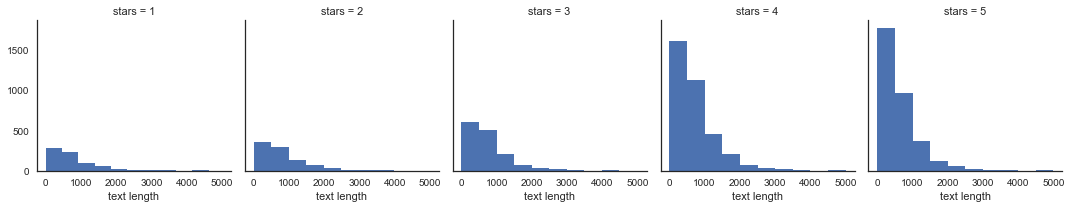

In [14]:
g = sns.FacetGrid(yelp, col='stars')
g.map(plt.hist, 'text length', bins=10)

**Create a boxplot of text length for each star category.**

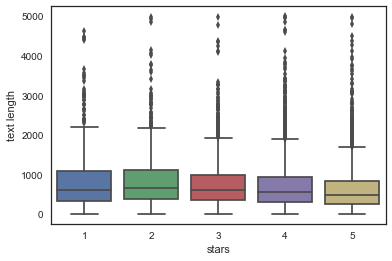

In [15]:
sns.boxplot(x='stars', y='text length', data=yelp)

**Create a countplot of the number of occurrences for each type of star rating.**

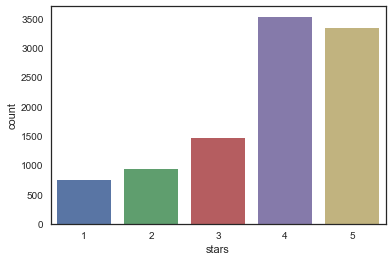

In [16]:
sns.countplot(x='stars', data=yelp)

** Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [17]:
ratings = yelp.groupby('stars').mean()
ratings

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


**Use the corr() method on that groupby dataframe to produce this dataframe:**

In [18]:
ratings.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


**Then use seaborn to create a heatmap based off that .corr() dataframe:**

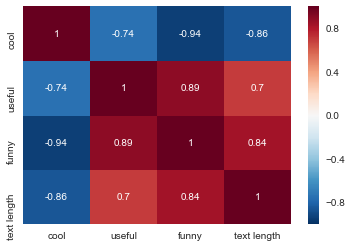

In [19]:
sns.heatmap(ratings.corr(), annot=True)

## NLP Classification Task

Let's move on to the actual task. To make things a little easier, go ahead and only grab reviews that were either 1 star or 5 stars.

**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [20]:
yelp_class = yelp[(yelp['stars']==1) | (yelp['stars']==5)]
#yelp_class = yelp[yelp['stars'].apply(lambda x : True if x == 1 or x == 5 else False)]

In [21]:
yelp_class.shape

(4086, 11)

In [22]:
yelp_class.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


# Text Preprocessing

In [23]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']

** Remove punctuation and stopwords from the text **

In [24]:
import string

In [25]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    no_stop_words  = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    no_stop_words = ' '.join(no_stop_words)
    
    return no_stop_words

In [26]:
yelp_class['clean_text'] = yelp_class['text'].apply(text_process)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [27]:
yelp_class['clean_text'].head()

0    wife took birthday breakfast excellent weather...
1    idea people give bad reviews place goes show p...
3    Rosie Dakota LOVE Chaparral Dog Park convenien...
4    General Manager Scott Petello good egg go deta...
6    Drop youre drive ate go back next day food goo...
Name: clean_text, dtype: object

# Training a Model

### Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(yelp_class['clean_text'], yelp_class['stars'], test_size=0.3, random_state=101)

In [30]:
X_train.head()

3608    I have found my new favorite sushi spot.\n\nI ...
2397    I have been exploring more of the park recentl...
6066    I've been taking mine and my family's cars to ...
7366    Absolutely waste of time & space is this estab...
5888    Ive been eating here more and more often latel...
Name: text, dtype: object

In [31]:
y_train.head()

3608    5
2397    5
6066    5
7366    1
5888    5
Name: stars, dtype: int64

### Step1: Bag of Words

** Import CountVector from sklearn **

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

### Step2: From Occurrances to Frequencies

** Import TfidfTransformer from sklearn. **

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer

### Classifiers

** Import Multinomial Naive Bayes from sklearn **

In [34]:
from sklearn.naive_bayes import MultinomialNB

### Pipeline
** Import Pipeline from sklearn. **

In [35]:
from sklearn.pipeline import Pipeline

### Prediction and Evaluation Model

** Import confusion_matrix & classification report from sklearn **

In [36]:
from sklearn.metrics import confusion_matrix, classification_report

## Model 1: Pipeline with CountVectorizer and MultinomialNB

In [37]:
pip1 = Pipeline([
    ('bow', CountVectorizer(stop_words='english')),
    ('classifier', MultinomialNB())
])

In [67]:
pip1.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [68]:
pred1 = pip1.predict(X_test)

In [69]:
# The result with CountVectorizer & MultinomialNB
print(confusion_matrix(y_test, pred1))
print(classification_report(y_test, pred1))

[[151  77]
 [ 13 985]]
             precision    recall  f1-score   support

          1       0.92      0.66      0.77       228
          5       0.93      0.99      0.96       998

avg / total       0.93      0.93      0.92      1226



## Model 2: Pipeline with CountVectorizer, Tf-Idf Transformer and MultinomialNB

In [83]:
# With Tf-idf transformer
pip2 = Pipeline([
    ('bow', CountVectorizer(stop_words='english')),
    ('tdidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [84]:
pip2.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        s...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [85]:
pred2 = pip2.predict(X_test)

In [86]:
# The result with CountVectorizer, Tf-idf transformer & MultinomialNB
print(confusion_matrix(y_test, pred2))
print(classification_report(y_test, pred2))

[[  0 228]
 [  0 998]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Model 3: Pipeline with CountVectorizer and SVM

In [47]:
from sklearn.svm import SVC

In [57]:
# With CountVectorizer & SVM
pip3 = Pipeline([
    ('bow', CountVectorizer(stop_words='english')),
    ('tdidf', TfidfTransformer()),
    ('classifier', SVC())
])

### GridSearch with SVM

** Use GridSearch to find the best parameters **

In [49]:
from sklearn.model_selection import GridSearchCV

In [89]:
parameter = {'classifier__C': [100, 1000, 10000], 'classifier__gamma': [0.005,0.001,0.0005], 'classifier__kernel': ['rbf']}

In [90]:
g_pip3 = GridSearchCV(pip3, parameter, refit=True)

In [92]:
g_pip3.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        s...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'classifier__C': [100, 1000, 10000], 'classifier__gamma': [0.005, 0.001, 0.0005], 'classifier__kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [93]:
g_pip3.best_params_

{'classifier__C': 1000,
 'classifier__gamma': 0.001,
 'classifier__kernel': 'rbf'}

In [94]:
g_pip3.best_score_

0.92902097902097902

In [95]:
pred3 = g_pip3.predict(X_test)

In [96]:
# The result with CountVectorizer & SVM
print(confusion_matrix(y_test, pred3))
print(classification_report(y_test, pred3))

[[176  52]
 [ 20 978]]
             precision    recall  f1-score   support

          1       0.90      0.77      0.83       228
          5       0.95      0.98      0.96       998

avg / total       0.94      0.94      0.94      1226



## Result

To make the performance better, some text preprocessing techniques are performed in the task, such as the punctuation and stopwords removal.

In the end, SVM with Tf-Idf tranformer seems to be the best classifier for this task 
with precision = 0.94, recall = 0.94 and f1-score = 0.94.

However, The reason why Multinomial Naive Bayes with Tf-Idf method reduce the performance siginificantly is still unknown and worth investigating further.

### Suggestions

1. Create a custom analyzer for the countvectorizer with the pipeline steps
2. Try out more ML models as the classifiers, e.g. Multinomial Naive Bayes, SVM and Random Forests

### Reference

[1] "Python for Data Science and Machine Learning BootCamp" course by Jose Portilla 

https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/